<a href="https://colab.research.google.com/github/vaidande/Cotton-Disease-Prediction-InceptionResNetV2-Xception-InceptionV3-VGG16/blob/main/Cotton_Disease_Prediction_Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Lambda, Flatten, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
from glob import glob

In [6]:
train_data = image_dataset_from_directory('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/train',
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(224, 224))
val_data = image_dataset_from_directory('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/val',
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(224, 224))

Found 1951 files belonging to 4 classes.
Found 324 files belonging to 4 classes.


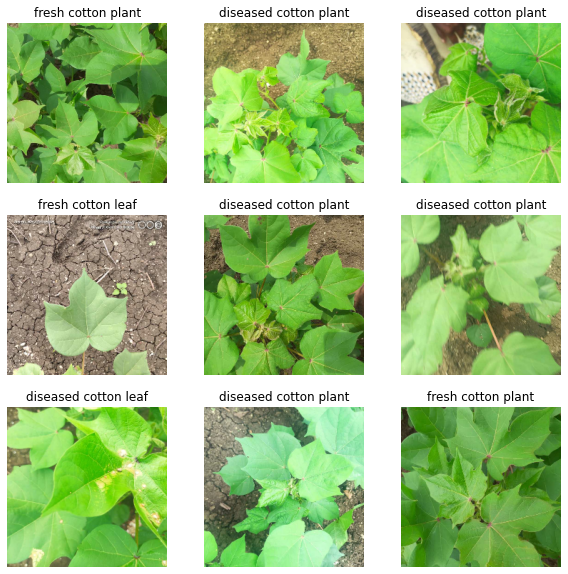

In [160]:
class_names = train_data.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [161]:
#Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [240]:
train_dataset = train_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
val_dataset = val_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


In [176]:
base_model = Xception(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

In [177]:
base_model.trainable = False

In [178]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_10[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [179]:
#useful for getting no. of output classes.
folders = glob('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/train/*')

In [182]:
x = MaxPooling2D()(base_model.output)
x = Flatten()(x)
x = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)

In [183]:
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_10[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [184]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [185]:
metric = 'val_accuracy'
checkpoint = ModelCheckpoint("/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/cottondisease_xception.h5", monitor = metric, save_best_only=True, mode = 'auto', verbose = 1)

In [186]:
initial_epochs = 10
r = model.fit_generator(train_dataset,
                        validation_data=val_dataset,
                        epochs=initial_epochs, callbacks = [checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
61/61 [==============================] - 46s 711ms/step - loss: 1.1470 - accuracy: 0.6272 - val_loss: 0.3765 - val_accuracy: 0.8488

Epoch 00001: val_accuracy improved from -inf to 0.84877, saving model to /content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/cottondisease_xception.h5
Epoch 2/10
61/61 [==============================] - 42s 693ms/step - loss: 0.2712 - accuracy: 0.9050 - val_loss: 0.3694 - val_accuracy: 0.8735

Epoch 00002: val_accuracy improved from 0.84877 to 0.87346, saving model to /content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/cottondisease_xception.h5
Epoch 3/10
61/61 [==============================] - 43s 704ms/step - loss: 0.2169 - accuracy: 0.9180 - val_loss: 0.3391 - val_accuracy: 0.8858

Epoch 00003: val_accuracy improved from 0.87346 to 0.88580, saving model to /content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/cottondisease_xception.h5
Epoch 4/10
61/61 [==============================] - 42s 694ms/step - loss: 0.1952 - accuracy: 0.9395 - 

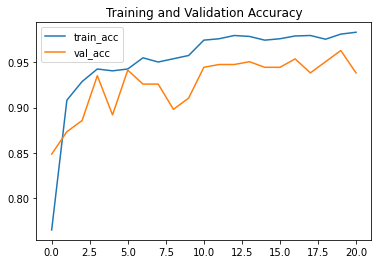

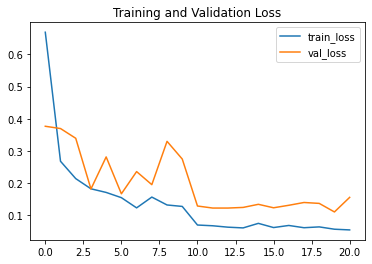

<Figure size 432x288 with 0 Axes>

In [210]:
import matplotlib.pyplot as plt

acc = r.history['accuracy']
val_acc = r.history['val_accuracy']

loss = r.history['loss']
val_loss = r.history['val_loss']

plt.plot(acc, label='train_acc')
plt.plot(val_acc, label='val_acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('Acc_ValAcc')

plt.plot(loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
plt.savefig('Loss_ValLoss')

In [189]:
base_model.trainable = True

In [193]:
for layer in base_model.layers:
  if layer.name == 'block14_sepconv1':
    break
  layer.trainable = False
  print('Layer '+layer.name+' frozen!')

Layer input_10 frozen!
Layer block1_conv1 frozen!
Layer block1_conv1_bn frozen!
Layer block1_conv1_act frozen!
Layer block1_conv2 frozen!
Layer block1_conv2_bn frozen!
Layer block1_conv2_act frozen!
Layer block2_sepconv1 frozen!
Layer block2_sepconv1_bn frozen!
Layer block2_sepconv2_act frozen!
Layer block2_sepconv2 frozen!
Layer block2_sepconv2_bn frozen!
Layer conv2d_302 frozen!
Layer block2_pool frozen!
Layer batch_normalization_302 frozen!
Layer add_60 frozen!
Layer block3_sepconv1_act frozen!
Layer block3_sepconv1 frozen!
Layer block3_sepconv1_bn frozen!
Layer block3_sepconv2_act frozen!
Layer block3_sepconv2 frozen!
Layer block3_sepconv2_bn frozen!
Layer conv2d_303 frozen!
Layer block3_pool frozen!
Layer batch_normalization_303 frozen!
Layer add_61 frozen!
Layer block4_sepconv1_act frozen!
Layer block4_sepconv1 frozen!
Layer block4_sepconv1_bn frozen!
Layer block4_sepconv2_act frozen!
Layer block4_sepconv2 frozen!
Layer block4_sepconv2_bn frozen!
Layer conv2d_304 frozen!
Layer bl

In [198]:
base_lr = 0.001
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr = base_lr/10), metrics=['accuracy'])

In [199]:
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

r_fine = model.fit_generator(train_dataset,
                        validation_data=val_dataset,
                        epochs=total_epochs,
                        initial_epoch = r.epoch[-1],
                        callbacks = [checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 10/20
61/61 [==============================] - 47s 712ms/step - loss: 0.0674 - accuracy: 0.9778 - val_loss: 0.1287 - val_accuracy: 0.9444

Epoch 00010: val_accuracy improved from 0.94136 to 0.94444, saving model to /content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/cottondisease_xception.h5
Epoch 11/20
61/61 [==============================] - 43s 699ms/step - loss: 0.0493 - accuracy: 0.9828 - val_loss: 0.1223 - val_accuracy: 0.9475

Epoch 00011: val_accuracy improved from 0.94444 to 0.94753, saving model to /content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/cottondisease_xception.h5
Epoch 12/20
61/61 [==============================] - 43s 698ms/step - loss: 0.0683 - accuracy: 0.9772 - val_loss: 0.1223 - val_accuracy: 0.9475

Epoch 00012: val_accuracy did not improve from 0.94753
Epoch 13/20
61/61 [==============================] - 42s 690ms/step - loss: 0.0507 - accuracy: 0.9837 - val_loss: 0.1243 - val_accuracy: 0.9506

Epoch 00013: val_accuracy improved from 0.94753 to 0.

In [202]:
acc += r_fine.history['accuracy']
val_acc += r_fine.history['val_accuracy']

loss += r_fine.history['loss']
val_loss += r_fine.history['val_loss']

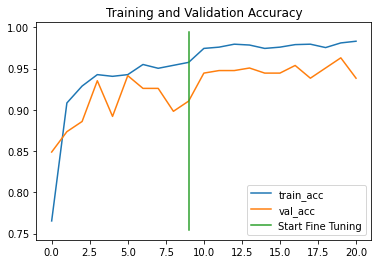

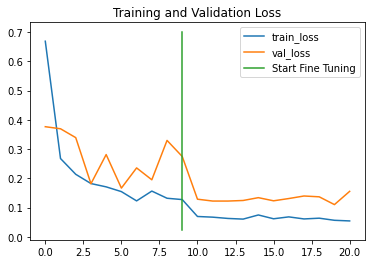

<Figure size 432x288 with 0 Axes>

In [212]:
plt.plot(acc, label='train_acc')
plt.plot(val_acc, label='val_acc')
plt.title('Training and Validation Accuracy')
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend()
plt.show()
plt.savefig('Acc_ValAcc')

plt.plot(loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.title('Training and Validation Loss')
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend()
plt.show()
plt.savefig('Loss_ValLoss')

In [219]:
from tensorflow.keras.models import load_model
model = load_model('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/cottondisease_xception.h5')

In [268]:
test_image=image.load_img('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/test/diseased cotton leaf/dis_leaf (248).jpg',target_size=(224,224))

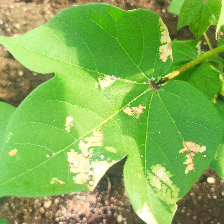

In [269]:
test_image

In [ ]:
test_img = image.img_to_array(test_image)
test_img = test_img/255
test_img = np.expand_dims(test_img, axis = 0)
result = model.predict(test_img)

In [106]:
a=np.argmax(result, axis=1)

In [128]:
if a==0:
  print("The Leaf is diseased Cotton Leaf")
elif a==1:
  print("The Leaf is diseased Cotton Plant")
elif a==2:
  print("The Leaf is fresh Cotton Leaf")
else:
  print("The Leaf is fresh Cotton Plant")

The Leaf is diseased Cotton Leaf
